In [36]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = '../10-10-2024_combined_distances_subsampling_256_512.csv'
df = pd.read_csv(csv_file)

# Show the first few rows to confirm the data is loaded correctly
print(df.head())

                    pdb_file  shortest_ARG126-GLU52  shortest_ARG126-PHE59  \
0   model_2_ptm_r3_seed1.pdb                    5.0                   15.0   
1   model_3_ptm_r4_seed7.pdb                    4.4                   15.2   
2   model_4_ptm_r1_seed6.pdb                    5.0                   15.8   
3   model_5_ptm_r6_seed0.pdb                    3.5                   14.4   
4  model_5_ptm_r11_seed2.pdb                    3.5                   14.5   

   shortest_ARG126-GLU62  shortest_ARG129-GLU52  shortest_ARG129-PHE59  \
0                   19.2                    0.9                    9.3   
1                   19.4                    3.8                   10.0   
2                   20.5                    4.4                    9.5   
3                   18.8                    5.3                    8.9   
4                   18.9                    5.2                    9.4   

   shortest_ARG129-GLU62  shortest_ARG132-GLU52  shortest_ARG132-PHE59  \
0           

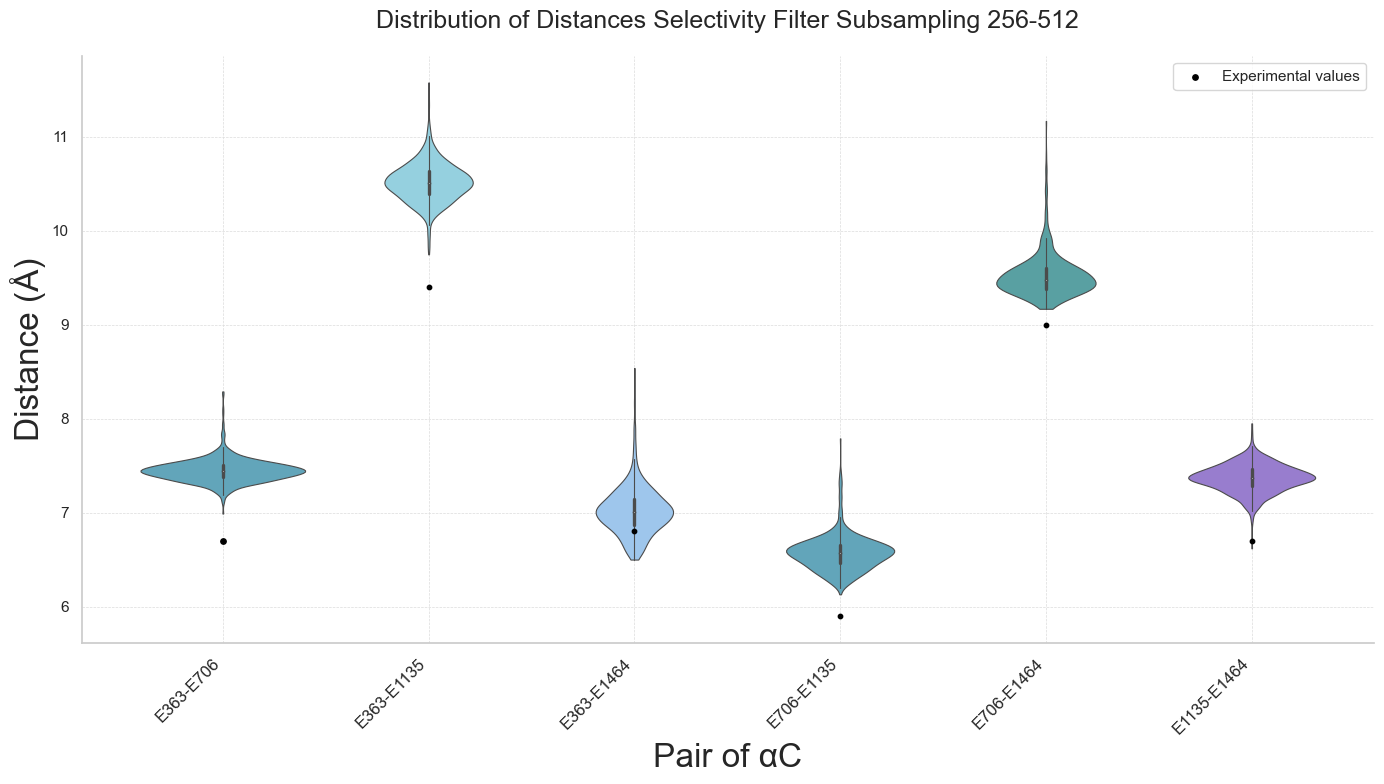

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distances_by_alias_violin(df, alias_dict, exp_distances_dict=None, title_custom_add='', colors=None, fig_width=6, fig_height=6):
    """
    Plots the distribution of distances by alias based on the specified columns in the DataFrame,
    and optionally overlays multiple experimental distances as scatter points for each alias.

    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    alias_dict (dict): A dictionary where keys are aliases, and values are the corresponding column names for distances.
    exp_distances_dict (dict): A dictionary where keys are aliases, and values are lists of experimental distances to overlay.
    title_custom_add (str): A custom addition to the plot title.
    colors (list): Optional list of colors to use for the violin plots. Must match the number of aliases.
    fig_width (int/float): The width of the figure.
    fig_height (int/float): The height of the figure.

    Returns:
    None: Displays the violin plot.
    """
    # Prepare the data for plotting
    plot_data = []
    labels = []

    # Loop through the dictionary
    for alias, column_name in alias_dict.items():
        # Check if the column exists in the DataFrame
        if column_name not in df.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue
        
        # Extract the distances, dropping NaN values
        distances = df[column_name].dropna()

        # Add the distances and the alias to the plot data
        plot_data.extend(distances)
        labels.extend([alias] * len(distances))  # Repeat the alias label for each distance value

    # Create a new DataFrame for the plotting data
    plot_df = pd.DataFrame({
        'Alias': labels,
        'Distance': plot_data
    })

    # Set a soft, elegant style for the plot
    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})
    
    # Create a color palette, either using the provided colors or defaulting to a subtle seaborn palette
    if colors and len(colors) == len(alias_dict):
        palette = colors
    else:
        palette = sns.color_palette("coolwarm", len(alias_dict))  # Soft gradient palette

    # Plot a violin plot for the distances by alias
    plt.figure(figsize=(fig_width, fig_height))  # Set figure size based on provided width and height
    sns.violinplot(x='Alias', y='Distance', data=plot_df, palette=palette, inner='box', cut=0, linewidth=0.8)

    # Overlay experimental distances if provided
    has_label = False  # Track if the label for experimental distances has been added
    if exp_distances_dict:
        for alias, exp_distances in exp_distances_dict.items():
            # Get the x position for the alias on the plot
            xpos = list(alias_dict.keys()).index(alias)
            # Plot each distance in the list
            for exp_distance in exp_distances:
                if not has_label:  # Add the label only once
                    plt.scatter([xpos], [exp_distance], color='black', zorder=5, s=15, marker='o', label='Experimental values')
                    has_label = True  # Set the flag to True after adding the label
                else:
                    plt.scatter([xpos], [exp_distance], color='black', zorder=5, s=10, marker='o')

    # Customize the plot appearance for a more elegant look
    plt.title(f'Distribution of Distances {title_custom_add}', fontsize=18, weight='light', pad=20)
    plt.xlabel('Pair of αC', fontsize=24, weight='light')
    plt.ylabel('Distance (Å)', fontsize=24, weight='light')

    # Lighten the gridlines and background to soften the overall appearance
    plt.grid(True, linestyle='--', linewidth=0.5, color='#dcdcdc')
    
    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=12, weight='light')

    # Remove the top and right spines for a cleaner look
    sns.despine()

    # Use a tighter layout to prevent overlapping of elements
    plt.tight_layout()
    plt.legend(loc='upper right')  # Show the legend for experimental sets
    plt.show()

# Example usage
alias_dict = {
    'E363-E706': 'CA_GLU252_CA-GLU595_CA',
    'E363-E1135': 'CA_GLU252_CA-GLU1024_CA',
    'E363-E1464': 'CA_GLU252_CA-GLU1353_CA',
    'E706-E1135': 'CA_GLU595_CA-GLU1024_CA',
    'E706-E1464': 'CA_GLU595_CA-GLU1353_CA',
    'E1135-E1464': 'CA_GLU1024_CA-GLU1353_CA',
}

# Optional list of custom colors
custom_colors = ['#53acc9', '#89d7eb', '#91c7f9', '#53acc9', '#4dabae', '#9370DB']

# Experimental distances to overlay (example values, with lists for each alias)
exp_distances_dict = {
    'E363-E706': [6.7],
    'E363-E1135': [9.4],
    'E363-E1464': [6.8],
    'E706-E1135': [5.9],
    'E706-E1464': [9.0],
    'E1135-E1464': [6.7]
}

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df, alias_dict, exp_distances_dict=exp_distances_dict, title_custom_add='Selectivity Filter Subsampling 256-512', colors=custom_colors, fig_width=14, fig_height=8)


In [38]:
# Custom color list
custom_colors_palette = [
    '#ea96a3',  # Recycle 0
    '#e39361',  # Recycle 1
    '#be9b4a',  # Recycle 2
    '#9fa046',  # Recycle 3
    '#7aaa48',  # Recycle 4
    '#48af79',  # Recycle 5
    '#4aac99',  # Recycle 6
    '#4dabae',  # Recycle 7
    '#53acc9',  # Recycle 8
    '#8eaee7',  # Recycle 9
    '#bfa3ea',  # Recycle 10
    '#e689e6',  # Recycle 11
    '#e891c3'   # Recycle 12
]

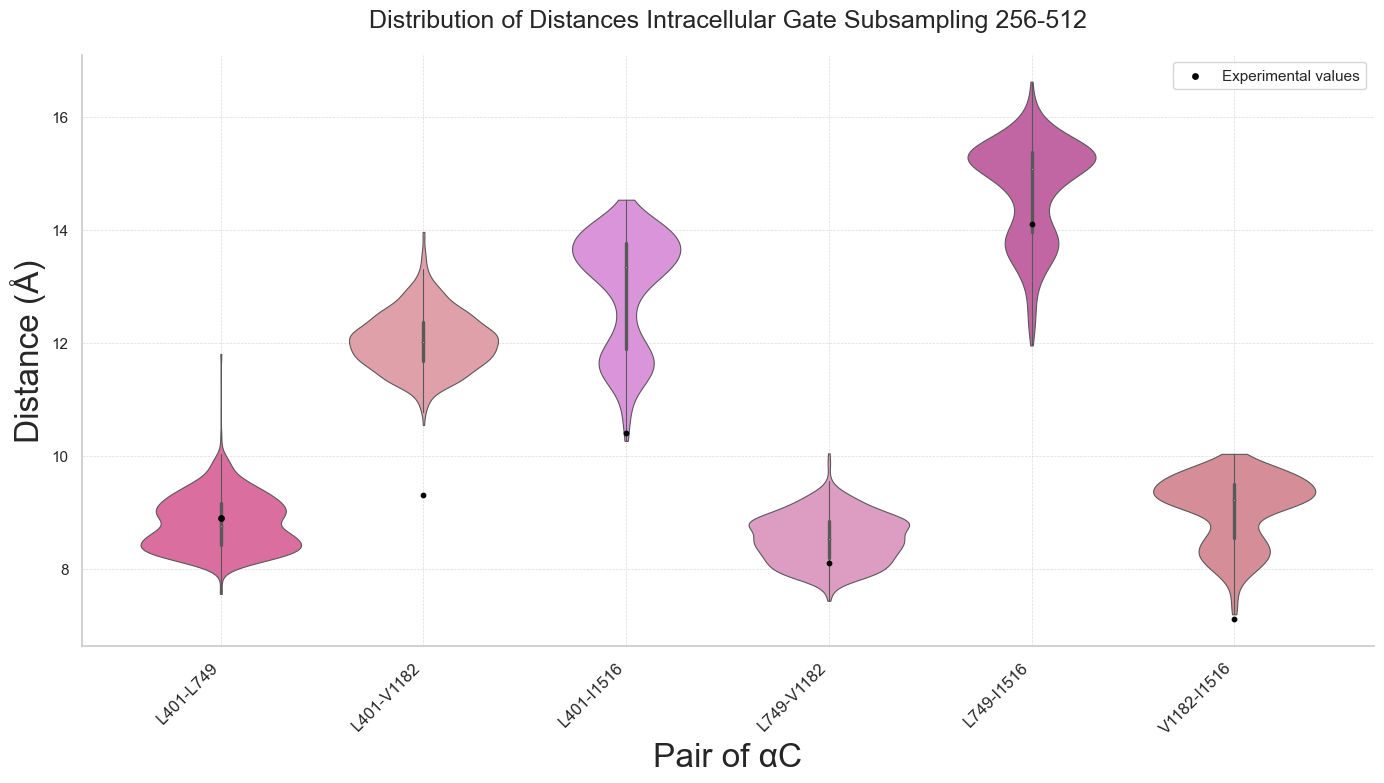

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distances_by_alias_violin(df, alias_dict, exp_distances_dict=None, title_custom_add='', colors=None, fig_width=6, fig_height=6):
    """
    Plots the distribution of distances by alias based on the specified columns in the DataFrame,
    and optionally overlays multiple experimental distances as scatter points for each alias.

    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    alias_dict (dict): A dictionary where keys are aliases, and values are the corresponding column names for distances.
    exp_distances_dict (dict): A dictionary where keys are aliases, and values are lists of experimental distances to overlay.
    title_custom_add (str): A custom addition to the plot title.
    colors (list): Optional list of colors to use for the violin plots. Must match the number of aliases.
    fig_width (int/float): The width of the figure.
    fig_height (int/float): The height of the figure.

    Returns:
    None: Displays the violin plot.
    """
    # Prepare the data for plotting
    plot_data = []
    labels = []

    # Loop through the dictionary
    for alias, column_name in alias_dict.items():
        # Check if the column exists in the DataFrame
        if column_name not in df.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue
        
        # Extract the distances, dropping NaN values
        distances = df[column_name].dropna()

        # Add the distances and the alias to the plot data
        plot_data.extend(distances)
        labels.extend([alias] * len(distances))  # Repeat the alias label for each distance value

    # Create a new DataFrame for the plotting data
    plot_df = pd.DataFrame({
        'Alias': labels,
        'Distance': plot_data
    })

    # Set a soft, elegant style for the plot
    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})
    
    # Create a color palette, either using the provided colors or defaulting to a subtle seaborn palette
    if colors and len(colors) == len(alias_dict):
        palette = colors
    else:
        palette = sns.color_palette("coolwarm", len(alias_dict))  # Soft gradient palette

    # Plot a violin plot for the distances by alias
    plt.figure(figsize=(fig_width, fig_height))  # Set figure size based on provided width and height
    sns.violinplot(x='Alias', y='Distance', data=plot_df, palette=palette, inner='box', cut=0, linewidth=0.8)

    # Overlay experimental distances if provided
    has_label = False  # Track if the label for experimental distances has been added
    if exp_distances_dict:
        for alias, exp_distances in exp_distances_dict.items():
            # Get the x position for the alias on the plot
            xpos = list(alias_dict.keys()).index(alias)
            # Plot each distance in the list
            for exp_distance in exp_distances:
                if not has_label:  # Add the label only once
                    plt.scatter([xpos], [exp_distance], color='black', zorder=5, s=15, marker='o', label='Experimental values')
                    has_label = True  # Set the flag to True after adding the label
                else:
                    plt.scatter([xpos], [exp_distance], color='black', zorder=5, s=10, marker='o')

    # Customize the plot appearance for a more elegant look
    plt.title(f'Distribution of Distances {title_custom_add}', fontsize=18, weight='light', pad=20)
    plt.xlabel('Pair of αC', fontsize=24, weight='light')
    plt.ylabel('Distance (Å)', fontsize=24, weight='light')

    # Lighten the gridlines and background to soften the overall appearance
    plt.grid(True, linestyle='--', linewidth=0.5, color='#dcdcdc')
    
    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=12, weight='light')

    # Remove the top and right spines for a cleaner look
    sns.despine()

    # Use a tighter layout to prevent overlapping of elements
    plt.tight_layout()
    plt.legend(loc='upper right')  # Show the legend for experimental sets
    plt.show()

# Example usage
alias_dict = {
    'L401-L749':'CA_LEU290_CA-LEU638_CA',
    'L401-V1182':'CA_LEU290_CA-VAL1071_CA',
    'L401-I1516':'CA_LEU290_CA-ILE1402_CA',
    'L749-V1182':'CA_LEU638_CA-VAL1071_CA',
    'L749-I1516':'CA_LEU638_CA-ILE1402_CA',
    'V1182-I1516':'CA_VAL1071_CA-ILE1402_CA'
}

# Optional list of custom colors
custom_colors = ['#eb5c9e', '#ea96a3', '#e689e6', '#e891c3', '#d057a8', '#e1818f']

# Experimental distances to overlay (example values, with lists for each alias)
exp_distances_dict = {
    'L401-L749':[8.9],
    'L401-V1182':[9.3],
    'L401-I1516':[10.4],
    'L749-V1182':[8.1],
    'L749-I1516':[14.1],
    'V1182-I1516':[7.1]
}

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df, alias_dict, exp_distances_dict=exp_distances_dict, title_custom_add='Intracellular Gate Subsampling 256-512', colors=custom_colors, fig_width=14, fig_height=8)
